# Unsupervised Machine Learning by K-Means Algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

In [48]:
# Load input data
#data = pd.read_excel('./data/Aggregate_Category_and_Subcategory_Scores_FIW_2003-2023_final.xlsx', index_col=None, na_values=['NaN'])
data = pd.read_csv('./data/freedom.csv', delimiter=',')
print(data)

         country  1972  1973  1974  1975  1976  1977  1978  1979  1980  ...  \
0    Afghanistan   4.5   6.5   6.5   6.5   6.5   6.0   7.0   7.0   7.0  ...   
1        Albania   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   
2        Algeria   6.0   6.0   6.0   6.5   6.0   6.0   6.0   6.0   6.0  ...   
3        Andorra   3.5   4.0   4.0   4.0   4.0   NaN   NaN   NaN   NaN  ...   
4         Angola   NaN   NaN   NaN   6.0   6.0   7.0   7.0   7.0   7.0  ...   
..           ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
188    Venezuela   2.0   2.0   2.0   2.0   1.5   1.5   1.5   1.5   1.5  ...   
189      Vietnam   6.0   6.0   6.0   7.0   7.0   7.0   7.0   7.0   7.0  ...   
190        Yemen   5.5   6.0   6.0   6.3   6.3   6.3   6.0   6.0   6.0  ...   
191       Zambia   5.0   5.0   4.5   5.0   5.0   5.0   5.0   5.0   5.5  ...   
192     Zimbabwe   5.5   5.5   5.5   5.5   5.5   5.5   5.0   4.0   3.5  ...   

     2009  2010  2011  2012  2013  2014  2015  2016

In [49]:
data

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2.0,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5
189,Vietnam,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
190,Yemen,5.5,6.0,6.0,6.3,6.3,6.3,6.0,6.0,6.0,...,5.5,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5
191,Zambia,5.0,5.0,4.5,5.0,5.0,5.0,5.0,5.0,5.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0


## Clean Data

In [55]:
data = data.fillna(0)

In [56]:
data = data.dropna()

In [57]:
data.isnull().sum()

country    0
1972       0
1973       0
1974       0
1975       0
1976       0
1977       0
1978       0
1979       0
1980       0
1981       0
1982       0
1983       0
1984       0
1985       0
1986       0
1987       0
1988       0
1989       0
1990       0
1991       0
1992       0
1993       0
1994       0
1995       0
1996       0
1997       0
1998       0
1999       0
2000       0
2001       0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
2017       0
2018       0
dtype: int64

In [58]:
data

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,Andorra,3.5,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,Angola,0.0,0.0,0.0,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2.0,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5
189,Vietnam,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
190,Yemen,5.5,6.0,6.0,6.3,6.3,6.3,6.0,6.0,6.0,...,5.5,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5
191,Zambia,5.0,5.0,4.5,5.0,5.0,5.0,5.0,5.0,5.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0


In [61]:
# Select attributes and convert to numpy
X = data.iloc[:, 1:].values
X

array([[4.5, 6.5, 6.5, ..., 6. , 5.5, 5.5],
       [7. , 7. , 7. , ..., 3. , 3. , 3. ],
       [6. , 6. , 6. , ..., 5.5, 5.5, 5.5],
       ...,
       [5.5, 6. , 6. , ..., 6.5, 6.5, 6.5],
       [5. , 5. , 4.5, ..., 4. , 4. , 4. ],
       [5.5, 5.5, 5.5, ..., 5. , 5.5, 5. ]])

In [62]:
# Determine k by minimizing the distortion - 
# the sum of the squared distances between each observation vector and its centroid
distortions = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    distortions.append(sum(np.min(cdist(X, model.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0]) 
print("Distortion: ", distortions)

C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are

C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Distortion:  [9.43947748507975, 8.051340275448311, 6.8245818112145065, 6.352092771927922, 6.004679473155514, 5.76332315353984, 5.567925142955252, 5.427347594771096]


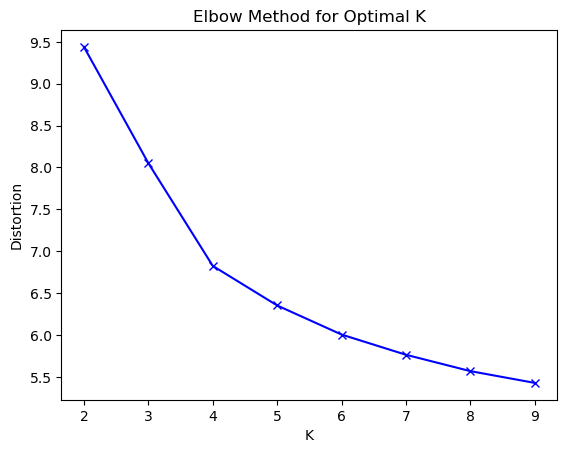

In [63]:
# Plot the elbow
plt.title('Elbow Method for Optimal K')
plt.plot(K, distortions, 'bx-')
plt.xlabel('K')
plt.ylabel('Distortion')
plt.show()

In [64]:
# Determine k by maximising the silhouette score for each number of clusters
scores = []
K = range(2,10)
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    model.fit(X)
    score = metrics.silhouette_score(X, model.labels_, metric='euclidean', sample_size=len(X))
    print("\nNumber of clusters =", k)
    print("Silhouette score =", score)
    scores.append(score)

C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 2
Silhouette score = 0.44626870095149923


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 3
Silhouette score = 0.3735504364504994


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 4
Silhouette score = 0.42227246419122044


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 5
Silhouette score = 0.37718957503531914


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 6
Silhouette score = 0.35446557898927566


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 7
Silhouette score = 0.33905715343675485


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 8
Silhouette score = 0.2871511608609088


C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are


Number of clusters = 9
Silhouette score = 0.2956246734323162


In [65]:
# Optimal number of clusters K
num_clusters = 4

In [66]:
# Create an instance of KMeans classifier
kmeans = KMeans(init='k-means++', n_clusters=num_clusters, n_init=20)
# init: method of experimemtal finding the initial location of the centroids
# n_init: the algorithm will run n_init times with different cetroids and the best result of those will be taken

In [67]:
# Train the KMeans clustering model
kmeans.fit(X)

C:\Users\Andre\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, n_init=20)

In [70]:
# Predict 4 clusters in X
y = kmeans.predict(X)
y

array([1, 3, 1, 0, 1, 0, 3, 2, 0, 0, 2, 0, 1, 3, 0, 2, 0, 0, 3, 1, 3, 2,
       0, 3, 1, 3, 3, 1, 1, 1, 0, 3, 1, 1, 3, 1, 3, 3, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 3, 1, 3, 1, 2, 0, 1, 1, 3, 0, 0, 1, 2, 2, 3, 3,
       0, 0, 3, 1, 1, 3, 1, 3, 3, 0, 3, 3, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1,
       0, 1, 2, 1, 0, 1, 3, 1, 1, 0, 0, 0, 3, 3, 3, 1, 3, 0, 0, 1, 0, 3,
       0, 2, 0, 3, 0, 1, 3, 1, 0, 0, 3, 0, 0, 3, 1, 1, 1, 2, 0, 1, 1, 0,
       3, 0, 3, 3, 3, 3, 0, 1, 3, 2, 1, 3, 0, 3, 1, 3, 0, 3, 3, 1, 0, 0,
       0, 1, 3, 3, 0, 0, 3, 0, 0, 0, 1, 3, 0, 0, 1, 2, 3, 3, 0, 1, 3, 0,
       1, 3, 2, 0, 1, 2, 1, 0, 0, 3, 2, 0, 2, 1, 1, 3, 1])

In [72]:
newDataY = pd.DataFrame(y)
newDataY

,0
0,1
1,3
2,1
3,0
4,1
...,...
188,2
189,1
190,1
191,3


In [74]:
newDataX = pd.DataFrame(X)

In [75]:
newDataX

,0,1,2,3,4,5,6,7,8,9,...,37,38,39,40,41,42,43,44,45,46
0,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5
1,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
2,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5
3,3.5,4.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,2.0,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,1.5,...,4.5,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5
189,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,6.5,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
190,5.5,6.0,6.0,6.3,6.3,6.3,6.0,6.0,6.0,6.0,...,5.5,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5
191,5.0,5.0,4.5,5.0,5.0,5.0,5.0,5.0,5.5,5.5,...,3.5,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0


In [76]:
# See the predicted labels of clusters
# cluster labels are stored in variable 'kmeans.labels_'
print(kmeans.labels_)

# same as print(Y)

[1 3 1 0 1 0 3 2 0 0 2 0 1 3 0 2 0 0 3 1 3 2 0 3 1 3 3 1 1 1 0 3 1 1 3 1 3
 3 1 1 0 1 0 1 0 0 0 1 0 0 3 1 3 1 2 0 1 1 3 0 0 1 2 2 3 3 0 0 3 1 1 3 1 3
 3 0 3 3 1 1 0 0 0 0 0 1 2 1 0 1 2 1 0 1 3 1 1 0 0 0 3 3 3 1 3 0 0 1 0 3 0
 2 0 3 0 1 3 1 0 0 3 0 0 3 1 1 1 2 0 1 1 0 3 0 3 3 3 3 0 1 3 2 1 3 0 3 1 3
 0 3 3 1 0 0 0 1 3 3 0 0 3 0 0 0 1 3 0 0 1 2 3 3 0 1 3 0 1 3 2 0 1 2 1 0 0
 3 2 0 2 1 1 3 1]


Cluster  0 :  (65, 47)


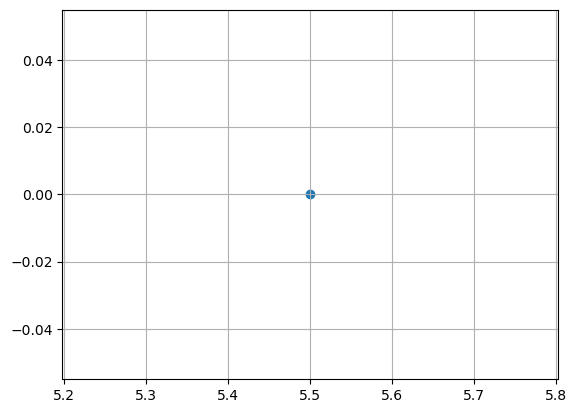

Cluster  1 :  (57, 47)


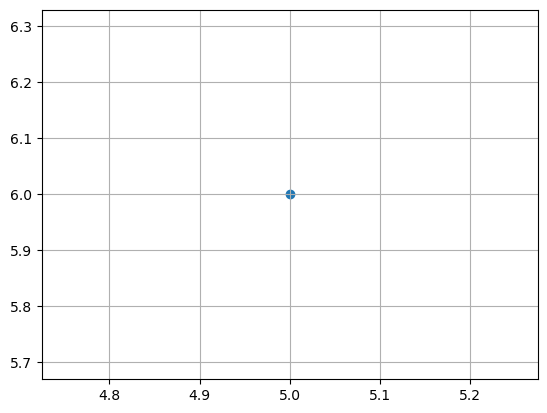

Cluster  2 :  (17, 47)


IndexError: index 46 is out of bounds for axis 0 with size 17

In [77]:
# Split the clusters, for demo purpose only
for i in range(num_clusters):
    # slice the cluster
    cluster = X[y == i]    
    # print the shape
    print("Cluster ", i, ": ", cluster.shape)    
    # plot the points of this cluster
    plt.scatter(cluster[46, 0], cluster[1, 1])   
    plt.grid(True)
    plt.show()

In [78]:
newtable = pd.concat([df, newDataY], axis=1, ignore_index=False)

In [79]:
type(y)

numpy.ndarray

In [80]:
newtable

,country,1972,1973,1974,1975,1976,1977,1978,1979,1980,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,0
0,Afghanistan,4.5,6.5,6.5,6.5,6.5,6.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,5.5,5.5,1
1,Albania,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,7.0,...,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3
2,Algeria,6.0,6.0,6.0,6.5,6.0,6.0,6.0,6.0,6.0,...,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,5.5,1
3,Andorra,3.5,4.0,4.0,4.0,4.0,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0
4,Angola,NaN,NaN,NaN,6.0,6.0,7.0,7.0,7.0,7.0,...,5.5,5.5,5.5,5.5,5.5,6.0,6.0,6.0,5.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,Venezuela,2.0,2.0,2.0,2.0,1.5,1.5,1.5,1.5,1.5,...,5.0,5.0,5.0,5.0,5.0,5.0,5.5,5.5,6.5,2
189,Vietnam,6.0,6.0,6.0,7.0,7.0,7.0,7.0,7.0,7.0,...,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1
190,Yemen,5.5,6.0,6.0,6.3,6.3,6.3,6.0,6.0,6.0,...,5.5,6.0,6.0,6.0,6.0,6.5,6.5,6.5,6.5,1
191,Zambia,5.0,5.0,4.5,5.0,5.0,5.0,5.0,5.0,5.5,...,3.5,3.5,3.5,3.5,3.5,3.5,4.0,4.0,4.0,3


In [81]:
newtable.to_csv('./data/newtable2.csv', index=False)

# Save fi

In [83]:
# Assuming you have a DataFrame named 'newtable' and you want to save it to a CSV file
csv_file_path = './deploy/MiniProject5_KMeans_newtable_v4.csv'

In [84]:
newtable.to_csv(csv_file_path, index=False)  # Save the DataFrame to a CSV file without including the index